In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os


In [2]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
print(parent_dir)
interpolated_dir = os.path.join(parent_dir, "dataset_interpolated_fixed")
features = ["score_difference", "relative_strength"]
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

import process_data

training_data = process_data.load_data(interpolated_dir, 
                                       years = [2016, 2017,2018, 2019, 2020, 2021, 2022], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win")

validation_data = process_data.load_data(interpolated_dir, 
                                       years = [2023], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = True
                                       )
                                       
test_data = process_data.load_data(interpolated_dir, 
                                       years = [2024],
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = False
                                       )




/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML
Loading data for 2022
  Processing 271 CSV files in parallel with 8 workers...
  Completed processing 2022
Loading data for 2023
skipping  2023
Loading data for .DS_Store
Loading data for 2017
  Processing 254 CSV files in parallel with 8 workers...
  Completed processing 2017
Loading data for 2019
  Processing 256 CSV files in parallel with 8 workers...
  Completed processing 2019
Loading data for 2021
  Processing 272 CSV files in parallel with 8 workers...
  Completed processing 2021
Loading data for 2020
  Processing 255 CSV files in parallel with 8 workers...
  Completed processing 2020
Loading data for 2018
  Processing 255 CSV files in parallel with 8 workers...
  Completed processing 2018
Loading data for 2016
  Processing 254 CSV files in parallel with 8 workers...
  Completed processing 2016
Loading data for 2022
skipping  2022
Loading data for 2023
  Processing 272 CSV files in parallel with 8 worke

In [32]:
test_data = process_data.load_data(interpolated_dir, 
                                       years = [2024],
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = False
                                       )


Loading data for 2022
skipping  2022
Loading data for 2024
  Processing 272 CSV files in parallel with 8 workers...
  Completed processing 2024
Loading data for 2023
skipping  2023
Loading data for .DS_Store
Loading data for 2017
skipping  2017
Loading data for 2019
skipping  2019
Loading data for 2021
skipping  2021
Loading data for 2020
skipping  2020
Loading data for 2018
skipping  2018
Loading data for 2016
skipping  2016


In [40]:
# Get information about the data
for timestep in training_data:
    print(f"timestep: {timestep}, number of instances: {len(training_data[timestep])}")

timestep: 0.0, number of instances: 3244
timestep: 0.005, number of instances: 1142
timestep: 0.01, number of instances: 2157
timestep: 0.015, number of instances: 1805
timestep: 0.02, number of instances: 2016
timestep: 0.025, number of instances: 2086
timestep: 0.03, number of instances: 1976
timestep: 0.035, number of instances: 2157
timestep: 0.04, number of instances: 2047
timestep: 0.045, number of instances: 2177
timestep: 0.05, number of instances: 2126
timestep: 0.055, number of instances: 2038
timestep: 0.06, number of instances: 2220
timestep: 0.065, number of instances: 2157
timestep: 0.07, number of instances: 2181
timestep: 0.075, number of instances: 2135
timestep: 0.08, number of instances: 2193
timestep: 0.085, number of instances: 2211
timestep: 0.09, number of instances: 2122
timestep: 0.095, number of instances: 2207
timestep: 0.1, number of instances: 2178
timestep: 0.105, number of instances: 2161
timestep: 0.11, number of instances: 2234
timestep: 0.115, number o

In [47]:
# Straw men tests
# - Initial probability
# - Coin toss at the start
# - Coin toss at each time step
from typing import Dict, Any
from models.Model import Model


class InitialProbabilityModel(Model):
    def __init__(self, features, label_feature):
        super().__init__(use_calibration=False, optimize_hyperparams=False, numeric_features=None, other_features=features, all_features=features, n_trials=0)
    

    def _define_search_space(self, trial) -> Dict[str, Any]:
        """Return a dict of parameters sampled from the search space."""
        return {}

    def _fixed_params(self) -> Dict[str, Any]:
        """Optional fixed params to merge into search params (subclass may override)."""
        return {}

    def _train_model(self, x_train, y_train, x_val, y_val, params):
        return None

    def fit(self, X, y):
        self._train_model()
    def predict(self, X: np.ndarray) -> np.ndarray:
        probs = self.predict_proba(X)[:, 1]
        return (probs > 0.5).astype(int)
    
    def predict_proba(self, X):
        relative_strength_idx = self.all_features.index("relative_strength")
        relative_strength = X[:, relative_strength_idx]
        return np.array([[1-s, s] for s in relative_strength])


class CoinFlipModel(Model):
    def __init__(self):
        super().__init__(use_calibration=False, optimize_hyperparams=False, numeric_features=None, other_features=None, all_features=None, n_trials=0)

    def _define_search_space(self, trial) -> Dict[str, Any]:
        """Return a dict of parameters sampled from the search space."""
        return {}

    def _fixed_params(self) -> Dict[str, Any]:
        """Optional fixed params to merge into search params (subclass may override)."""
        return {}

    def _train_model(self, x_train, y_train, x_val, y_val, params):
        return None

    def fit(self, X, y):
        self._train_model()
    def predict(self, X: np.ndarray) -> np.ndarray:
        probs = self.predict_proba(X)[:, 1]
        return (probs > 0.5).astype(int)
    
    def predict_proba(self, X):
        n = X.shape[0]
        random_choices = np.random.choice([0, 1], size=n)
        # For each row, output [1, 0] if random choice is 0; [0, 1] if random choice is 1
        return np.array([[1, 0] if r == 0 else [0, 1] for r in random_choices])

In [51]:
def setup_initial_probability_models(features):
    models = {}
    for timestep in training_data:
        model = InitialProbabilityModel(features, "home_win")
        models[timestep] = model
    return models

def setup_coin_flip_models():
    models = {}
    for timestep in training_data:
        model = CoinFlipModel()
        models[timestep] = model
    return models

models = setup_coin_flip_models()

In [58]:
models[0].predict_proba(np.array([[0, 0]]))

array([[0, 1]])

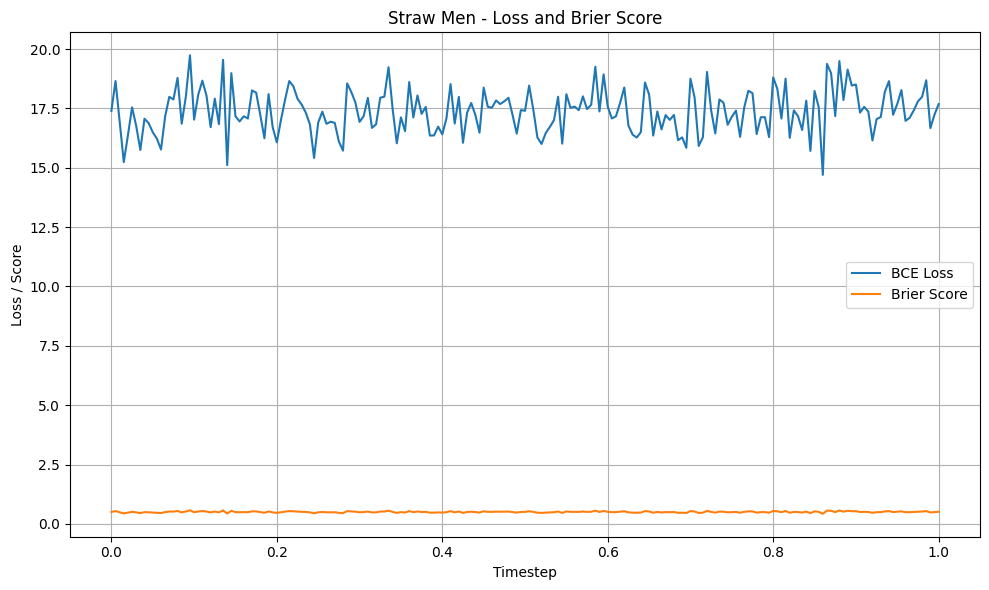

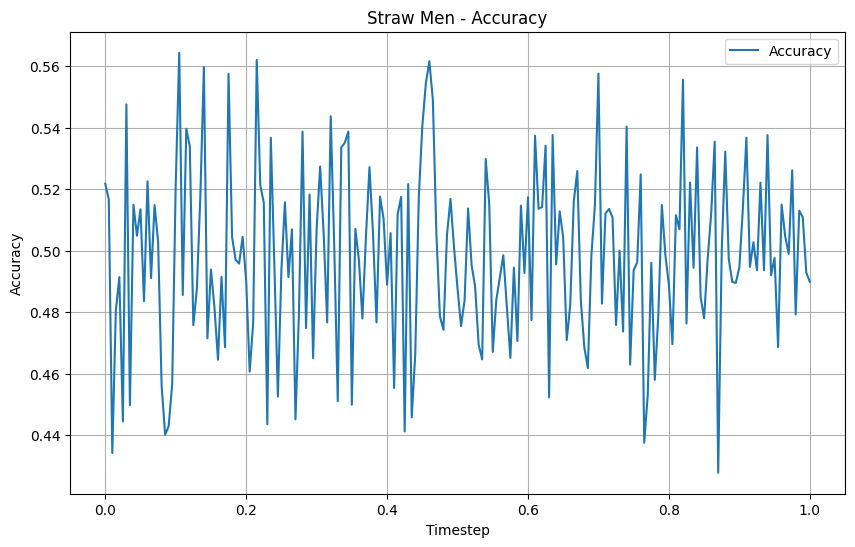

In [61]:
import process_data
modules_to_reload = [
    'process_data',
]

import importlib
for module_name in modules_to_reload:
    if module_name in globals():
        importlib.reload(globals()[module_name])
    elif module_name in locals():
        importlib.reload(locals()[module_name])
    else:
        try:
            mod = __import__(module_name)
            importlib.reload(mod)
        except Exception as e:
            print(f"Could not reload {module_name}: {e}")


import process_data

process_data.plot_loss(models, test_data, "Straw Men")
process_data.plot_accuracy(models, test_data, "Straw Men")

In [62]:
from process_data import write_predictions

write_predictions(models, interpolated_dir, [2024], 0, features, replace_nan_val = 0, phat_b = "coin_flip_phat_b")

Loading data for 2024
Processed file:  game_401671629.csv
Processed file:  game_401671601.csv
Processed file:  game_401671826.csv
Processed file:  game_401671832.csv
Processed file:  game_401671749.csv
Processed file:  game_401671775.csv
Processed file:  game_401671761.csv
Processed file:  game_401671760.csv
Processed file:  game_401671774.csv
Processed file:  game_401671748.csv
Processed file:  game_401671833.csv
Processed file:  game_401671827.csv
Processed file:  game_401671600.csv
Processed file:  game_401671628.csv
Processed file:  game_401671616.csv
Processed file:  game_401671831.csv
Processed file:  game_401671825.csv
Processed file:  game_401671819.csv
Processed file:  game_401671762.csv
Processed file:  game_401671776.csv
Processed file:  game_401671789.csv
Processed file:  game_401671788.csv
Processed file:  game_401671777.csv
Processed file:  game_401671763.csv
Processed file:  game_401671818.csv
Processed file:  game_401671824.csv
Processed file:  game_401671830.csv
Proces

In [63]:
# Always predict 1
def always_predict_1(interpolated_dir, years, phat_b = "1_phat_b"):
    # Write the predictions to csv file
    for folder in os.listdir(interpolated_dir):
        folder_path = os.path.join(interpolated_dir, folder)
        if os.path.isdir(folder_path):
            if (int(folder) in years):
                print(f"Loading data for {folder}")
                for file in os.listdir(folder_path):
                    if file.endswith(".csv"):
                        file_path = os.path.join(folder_path, file)
                        df = pd.read_csv(file_path)
                        for idx in range(1, len(df)):
                            df.at[idx, phat_b] = 1
                        df.to_csv(file_path, index=False)
                        print("Processed file: ", file)

always_predict_1(interpolated_dir, [2024])

Loading data for 2024
Processed file:  game_401671629.csv
Processed file:  game_401671601.csv
Processed file:  game_401671826.csv
Processed file:  game_401671832.csv
Processed file:  game_401671749.csv
Processed file:  game_401671775.csv
Processed file:  game_401671761.csv
Processed file:  game_401671760.csv
Processed file:  game_401671774.csv
Processed file:  game_401671748.csv
Processed file:  game_401671833.csv
Processed file:  game_401671827.csv
Processed file:  game_401671600.csv
Processed file:  game_401671628.csv
Processed file:  game_401671616.csv
Processed file:  game_401671831.csv
Processed file:  game_401671825.csv
Processed file:  game_401671819.csv
Processed file:  game_401671762.csv
Processed file:  game_401671776.csv
Processed file:  game_401671789.csv
Processed file:  game_401671788.csv
Processed file:  game_401671777.csv
Processed file:  game_401671763.csv
Processed file:  game_401671818.csv
Processed file:  game_401671824.csv
Processed file:  game_401671830.csv
Proces